In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from function_examples import *

%load_ext autoreload
%autoreload 2

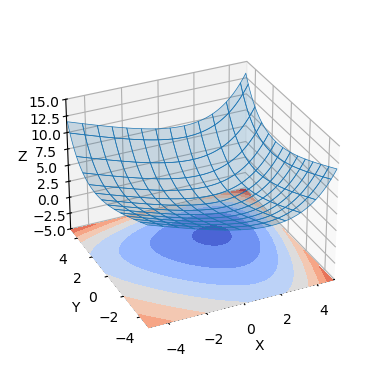

In [2]:
# Plot the 2D convex function
plot_function_2d()

In [3]:
def newton_nd(f, f_grad, f_hess, initial_x, epsilon=1e-12, print_all=True):
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x.copy()
    pos_graph = [x]
    val_graph = [f(x)]
    while (np.linalg.norm(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x.copy()
        # Newton's method
        x = x - np.linalg.inv(f_hess(x)) @ f_grad(x)
        pos_graph.append(x)
        val_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {nb_iterations}, #hessian = {nb_iterations}")
    return np.array(pos_graph), np.array(val_graph)

Iteration 1, x = [4.65501083 2.9215969 ], f(x) = 6.985125549427126
Iteration 2, x = [3.04516588 1.84980058], f(x) = 2.210700600766879
Iteration 3, x = [1.91775667 1.43608442], f(x) = 1.3053425721473193
Iteration 4, x = [1.45104709 1.38690901], f(x) = 1.2284710058623791
Iteration 5, x = [1.38733137 1.38629446], f(x) = 1.2274115466526927
Iteration 6, x = [1.38629463 1.38629436], f(x) = 1.2274112777602368
Iteration 7, x = [1.38629436 1.38629436], f(x) = 1.2274112777602189
Iteration 8, x = [1.38629436 1.38629436], f(x) = 1.2274112777602189
#iterations = 8, #gradient = 8, #hessian = 8


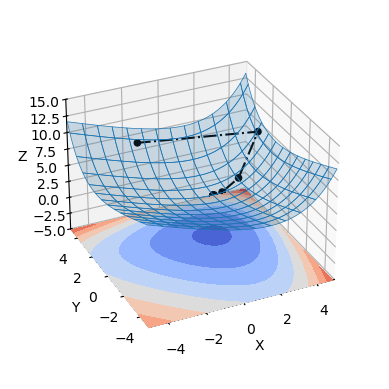

In [4]:
initial_x = np.array([-1.4, 4.5])
pos3_newton_nd, val3_newton_nd = newton_nd(fnd, fnd_grad, fnd_hess, initial_x)
plot_convergence_2d(pos3_newton_nd, val3_newton_nd)

In [5]:
def coord_descent_nd(f, f_grad, initial_x, lambda_, epsilon=1e-12, print_all=True):
    np.random.seed(0)
    coord_prev = -1
    coord = -1
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x.copy()
    pos_graph = [x.copy()]
    val_graph = [f(x.copy())]
    while (np.linalg.norm(x - x_prev) >= epsilon or coord_prev == coord):
        nb_iterations += 1
        x_prev = x.copy()
        coord_prev = coord
        # Coordinate descent
        # Choose random coordinate
        coord = np.random.randint(x.size)
        x[coord] = x[coord] - lambda_ * f_grad(x)[coord]
        pos_graph.append(x.copy())
        val_graph.append(f(x.copy()))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x.copy()}, f(x) = {f(x.copy())}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {nb_iterations}")
    return np.array(pos_graph), np.array(val_graph)

Iteration 1, x = [0.1034147 4.5      ], f(x) = 5.937388655359217
Iteration 2, x = [ 0.1034147  -2.98773584], f(x) = 4.161891271612278
Iteration 3, x = [ 0.1034147  -1.21223845], f(x) = 2.7073548592860552
Iteration 4, x = [ 1.05034718 -1.21223845], f(x) = 2.398107180732614
Iteration 5, x = [1.05034718 0.24229796], f(x) = 1.5269002480039033
Iteration 6, x = [1.05034718 1.11350489], f(x) = 1.2718965670476934
Iteration 7, x = [1.05034718 1.36850857], f(x) = 1.2541896289815866
Iteration 8, x = [1.05034718 1.38621551], f(x) = 1.254110780881655
Iteration 9, x = [1.05034718 1.38629436], f(x) = 1.2541107793273585
Iteration 10, x = [1.05034718 1.38629436], f(x) = 1.2541107793273585
Iteration 11, x = [1.05034718 1.38629436], f(x) = 1.2541107793273585
Iteration 12, x = [1.35959486 1.38629436], f(x) = 1.227588703200182
Iteration 13, x = [1.38611694 1.38629436], f(x) = 1.2274112856299328
Iteration 14, x = [1.38611694 1.38629436], f(x) = 1.2274112856299328
#iterations = 14, #gradient = 14


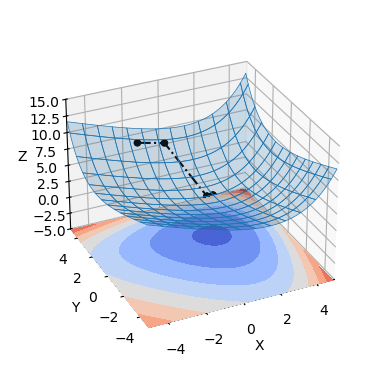

In [6]:
lambda_ = 2.0
pos3_coord_descent_nd, val3_coord_descent_nd = coord_descent_nd(fnd, fnd_grad, initial_x, lambda_)
plot_convergence_2d(pos3_coord_descent_nd, val3_coord_descent_nd)

In [7]:
def coord_descent_ordered_nd(f, f_grad, initial_x, lambda_, epsilon=1e-12, print_all=True):
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x.copy()
    pos_graph = [x.copy()]
    val_graph = [f(x.copy())]
    while (np.linalg.norm(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x.copy()
        # Coordinate descent
        coord = nb_iterations % x.size
        x[coord] = x[coord] - lambda_ * f_grad(x)[coord]
        pos_graph.append(x.copy())
        val_graph.append(f(x.copy()))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x.copy()}, f(x) = {f(x.copy())}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {nb_iterations}")
    return np.array(pos_graph), np.array(val_graph)

Iteration 1, x = [-1.4        -2.98773584], f(x) = 5.108823756402996
Iteration 2, x = [ 0.1034147  -2.98773584], f(x) = 4.161891271612278
Iteration 3, x = [ 0.1034147  -1.21223845], f(x) = 2.7073548592860552
Iteration 4, x = [ 1.05034718 -1.21223845], f(x) = 2.398107180732614
Iteration 5, x = [1.05034718 0.24229796], f(x) = 1.5269002480039033
Iteration 6, x = [1.35959486 0.24229796], f(x) = 1.5003781718767268
Iteration 7, x = [1.35959486 1.11350489], f(x) = 1.2453744909205169
Iteration 8, x = [1.38611694 1.11350489], f(x) = 1.2451970733502677
Iteration 9, x = [1.38611694 1.36850857], f(x) = 1.227490135284161
Iteration 10, x = [1.38629435 1.36850857], f(x) = 1.227490127414447
Iteration 11, x = [1.38629435 1.38621551], f(x) = 1.2274112793145153
Iteration 12, x = [1.38629436 1.38621551], f(x) = 1.2274112793145153
Iteration 13, x = [1.38629436 1.38629436], f(x) = 1.2274112777602189
Iteration 14, x = [1.38629436 1.38629436], f(x) = 1.2274112777602189
#iterations = 14, #gradient = 14


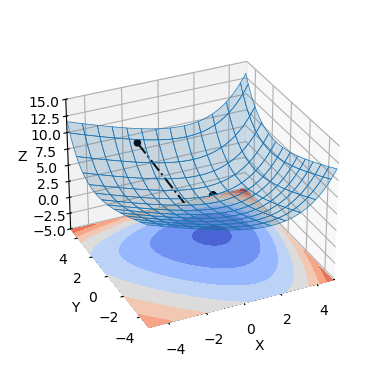

In [8]:
pos3_coord_descent_ordered_nd, val3_coord_descent_ordered_nd = coord_descent_ordered_nd(fnd, fnd_grad, initial_x, lambda_)
plot_convergence_2d(pos3_coord_descent_ordered_nd, val3_coord_descent_ordered_nd)

In [9]:
def steep_coord_descent_nd(f, f_grad, initial_x, lambda_, epsilon=1e-12, print_all=True):
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x.copy()
    pos_graph = [x.copy()]
    val_graph = [f(x.copy())]
    while (np.linalg.norm(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x.copy()
        # Coordinate descent
        grad = f_grad(x)
        coord = np.argmax(np.abs(grad))
        x[coord] = x[coord] - lambda_ * grad[coord]
        pos_graph.append(x.copy())
        val_graph.append(f(x.copy()))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x.copy()}, f(x) = {f(x.copy())}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {nb_iterations}")
    return np.array(pos_graph), np.array(val_graph)

Iteration 1, x = [-1.4        -2.98773584], f(x) = 5.108823756402996
Iteration 2, x = [-1.4        -1.21223845], f(x) = 3.6542873440767742
Iteration 3, x = [ 0.1034147  -1.21223845], f(x) = 2.7073548592860552
Iteration 4, x = [0.1034147  0.24229796], f(x) = 1.8361479265573448
Iteration 5, x = [1.05034718 0.24229796], f(x) = 1.5269002480039033
Iteration 6, x = [1.05034718 1.11350489], f(x) = 1.2718965670476934
Iteration 7, x = [1.35959486 1.11350489], f(x) = 1.2453744909205169
Iteration 8, x = [1.35959486 1.36850857], f(x) = 1.22766755285441
Iteration 9, x = [1.38611694 1.36850857], f(x) = 1.227490135284161
Iteration 10, x = [1.38611694 1.38621551], f(x) = 1.2274112871842293
Iteration 11, x = [1.38629435 1.38621551], f(x) = 1.2274112793145153
Iteration 12, x = [1.38629435 1.38629436], f(x) = 1.2274112777602189
Iteration 13, x = [1.38629436 1.38629436], f(x) = 1.2274112777602189
Iteration 14, x = [1.38629436 1.38629436], f(x) = 1.2274112777602189
Iteration 15, x = [1.38629436 1.38629436]

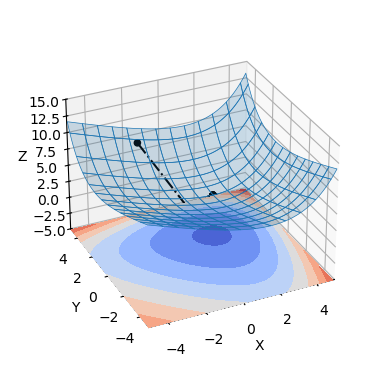

In [10]:
pos3_steep_coord_descent_nd, val3_steep_coord_descent_nd = steep_coord_descent_nd(fnd, fnd_grad, initial_x, lambda_)
plot_convergence_2d(pos3_steep_coord_descent_nd, val3_steep_coord_descent_nd)

In [11]:
def coord_descent_newton_nd(f, initial_x, h, epsilon=1e-12, print_all=True):
    np.random.seed(0)
    coord_prev = -1
    coord = -1
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x.copy()
    pos_graph = [x.copy()]
    val_graph = [f(x.copy())]
    while (np.linalg.norm(x - x_prev) >= epsilon or coord_prev == coord):
        nb_iterations += 1
        x_prev = x.copy()
        coord_prev = coord
        # Coordinate descent
        # Choose random coordinate
        coord = np.random.randint(x.size)
        # Approximate gradient[coord] and hessian[coord] using finite differences :
        # f'(x) = (1/2 f(x + h) - 1/2 f(x - h)) / h + O(h^2)
        # f''(x) = (f(x + h) - 2 f(x) + f(x - h)) / h^2 + O(h^2)
        h_vect = np.zeros_like(x)
        h_vect[coord] = h
        f_xm1 = f(x - h_vect)
        f_x = f(x)
        f_xp1 = f(x + h_vect)
        f_grad_coord = (f_xp1 - f_xm1) / (2 * h)
        f_hess_coord = (f_xp1 - 2 * f_x + f_xm1) / (h * h)
        x[coord] = x[coord] - f_grad_coord / f_hess_coord
        pos_graph.append(x.copy())
        val_graph.append(f(x.copy()))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x.copy()}, f(x) = {f(x.copy())}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #evaluations = {3*nb_iterations}")
    return np.array(pos_graph), np.array(val_graph)

Iteration 1, x = [4.68882902 4.5       ], f(x) = 10.726072746476774
Iteration 2, x = [4.68882902 2.92008226], f(x) = 7.124391281173136
Iteration 3, x = [4.68882902 1.84892755], f(x) = 6.409925693356256
Iteration 4, x = [3.07300045 1.84892755], f(x) = 2.2468821253370583
Iteration 5, x = [3.07300045 1.43650722], f(x) = 2.189634622136777
Iteration 6, x = [3.07300045 1.38698272], f(x) = 2.1889990994524022
Iteration 7, x = [3.07300045 1.38629552], f(x) = 2.1889989809794974
Iteration 8, x = [3.07300045 1.38629436], f(x) = 2.188998980979159
Iteration 9, x = [3.07300045 1.38629436], f(x) = 2.188998980979159
Iteration 10, x = [3.07300045 1.38629436], f(x) = 2.188998980979159
Iteration 11, x = [3.07300045 1.38629436], f(x) = 2.188998980979159
Iteration 12, x = [1.93320162 1.38629436], f(x) = 1.3094968276848356
Iteration 13, x = [1.45469963 1.38629436], f(x) = 1.228594549806376
Iteration 14, x = [1.45469963 1.38629436], f(x) = 1.2285945498063757
Iteration 15, x = [1.38744664 1.38629436], f(x) = 1

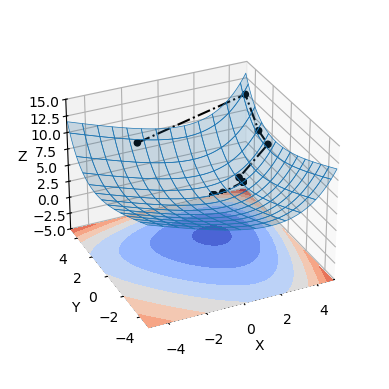

In [12]:
h = 1e-6
pos3_coord_descent_newton_nd, val3_coord_descent_newton_nd = coord_descent_newton_nd(fnd, initial_x, h)
plot_convergence_2d(pos3_coord_descent_newton_nd, val3_coord_descent_newton_nd)

In [13]:
def coord_descent_ordered_newton_nd(f, initial_x, h, epsilon=1e-12, print_all=True):
    np.random.seed(0)
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x.copy()
    pos_graph = [x.copy()]
    val_graph = [f(x.copy())]
    while (np.linalg.norm(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x.copy()
        # Coordinate descent inspired by Newton's method
        # Choose random coordinate
        coord = nb_iterations % x.size
        # Approximate gradient[coord] and hessian[coord] using finite differences :
        # f'(x) = (1/2 f(x + h) - 1/2 f(x - h)) / h + O(h^2)
        # f''(x) = (f(x + h) - 2 f(x) + f(x - h)) / h^2 + O(h^2)
        h_vect = np.zeros_like(x)
        h_vect[coord] = h
        f_xm1 = f(x - h_vect)
        f_x = f(x)
        f_xp1 = f(x + h_vect)
        f_grad_coord = (f_xp1 - f_xm1) / (2 * h)
        f_hess_coord = (f_xp1 - 2 * f_x + f_xm1) / (h * h)
        x[coord] = x[coord] - f_grad_coord / f_hess_coord
        pos_graph.append(x.copy())
        val_graph.append(f(x.copy()))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x.copy()}, f(x) = {f(x.copy())}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #evaluations = {3*nb_iterations}")
    return np.array(pos_graph), np.array(val_graph)

Iteration 1, x = [-1.4         2.91889702], f(x) = 3.2812737747957352
Iteration 2, x = [4.62382372 2.91889702], f(x) = 6.8545687363342385
Iteration 3, x = [4.62382372 1.84715872], f(x) = 6.1410096821131654
Iteration 4, x = [3.01947503 1.84715872], f(x) = 2.177197140995212
Iteration 5, x = [3.01947503 1.43563505], f(x) = 2.12038702498568
Iteration 6, x = [1.90349844 1.43563505], f(x) = 1.3010574536543376
Iteration 7, x = [1.90349844 1.3868971 ], f(x) = 1.3004438825922355
Iteration 8, x = [1.44739183 1.3868971 ], f(x) = 1.2283541698786395
Iteration 9, x = [1.44739183 1.38629432], f(x) = 1.2283540790471301
Iteration 10, x = [1.38717533 1.38629432], f(x) = 1.2274114718174338
Iteration 11, x = [1.38717533 1.38629436], f(x) = 1.2274114718174336
Iteration 12, x = [1.38629503 1.38629436], f(x) = 1.2274112777603299
Iteration 13, x = [1.38629503 1.38629436], f(x) = 1.2274112777603299
#iterations = 13, #evaluations = 39


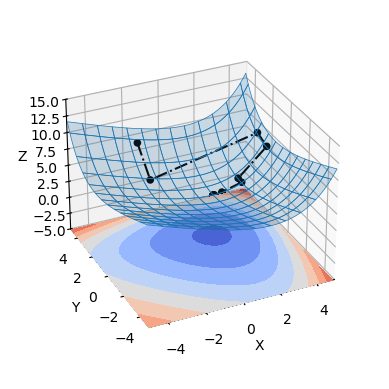

In [14]:
pos3_coord_descent_ordered_newton_nd, val3_coord_descent_ordered_newton_nd = coord_descent_ordered_newton_nd(fnd, initial_x, h)
plot_convergence_2d(pos3_coord_descent_ordered_newton_nd, val3_coord_descent_ordered_newton_nd)

In [15]:
def coord_descent_ordered_newton4_nd(f, initial_x, h, epsilon=1e-12, print_all=True):
    np.random.seed(0)
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x.copy()
    pos_graph = [x.copy()]
    val_graph = [f(x.copy())]
    while (np.linalg.norm(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x.copy()
        # Coordinate descent inspired by Newton's method
        # Choose random coordinate
        coord = nb_iterations % x.size
        # Approximate gradient[coord] and hessian[coord] using finite differences :
        # f'(x) = (-1/12 f(x + 2h) + 2/3 f(x + h) - 2/3 f(x - h) + 1/12 f(x - 2h)) / h + O(h^4)
        # f''(x) = (-1/12 f(x + 2h) + 4/3 f(x + h) - 5/2 f(x) + 4/3 f(x - h) - 1/12 f(x - 2h)) / h^2 + O(h^4)
        h_vect = np.zeros_like(x)
        h_vect[coord] = h
        f_xm2 = f(x - 2 * h_vect)
        f_xm1 = f(x - h_vect)
        f_x = f(x)
        f_xp1 = f(x + h_vect)
        f_xp2 = f(x + 2 * h_vect)
        f_grad_coord = (-f_xp2 + 8*f_xp1 - 8*f_xm1 + f_xm2) / (12 * h)
        f_hess_coord = (-f_xp2 + 16*f_xp1 - 30*f_x + 16*f_xm1 - f_xm2) / (12 * h * h)
        x[coord] = x[coord] - f_grad_coord / f_hess_coord
        pos_graph.append(x.copy())
        val_graph.append(f(x.copy()))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x.copy()}, f(x) = {f(x.copy())}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #evaluations = {5*nb_iterations}")
    return np.array(pos_graph), np.array(val_graph)

Iteration 1, x = [-1.4        2.9215969], f(x) = 3.2843873933122856
Iteration 2, x = [4.6550108 2.9215969], f(x) = 6.985125439567344
Iteration 3, x = [4.6550108  1.84980058], f(x) = 6.26913958639867
Iteration 4, x = [3.04516586 1.84980058], f(x) = 2.2107005736849183
Iteration 5, x = [3.04516586 1.43608442], f(x) = 2.1532149137600447
Iteration 6, x = [1.91775665 1.43608442], f(x) = 1.305342568565212
Iteration 7, x = [1.91775665 1.38690901], f(x) = 1.3047177254766962
Iteration 8, x = [1.45104708 1.38690901], f(x) = 1.228471005782243
Iteration 9, x = [1.45104708 1.38629446], f(x) = 1.228470911323542
Iteration 10, x = [1.38733137 1.38629446], f(x) = 1.2274115466526236
Iteration 11, x = [1.38733137 1.38629436], f(x) = 1.2274115466526214
Iteration 12, x = [1.38629463 1.38629436], f(x) = 1.227411277760237
Iteration 13, x = [1.38629463 1.38629436], f(x) = 1.227411277760237
#iterations = 13, #evaluations = 65


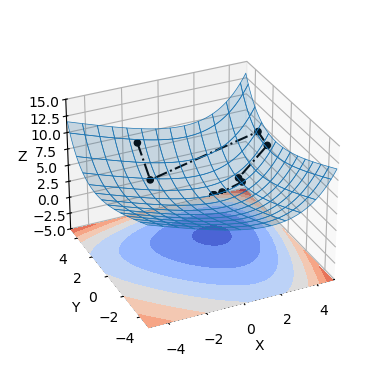

In [16]:
h = np.sqrt(h)
pos3_coord_descent_ordered_newton4_nd, val3_coord_descent_ordered_newton4_nd = coord_descent_ordered_newton4_nd(fnd, initial_x, h)
plot_convergence_2d(pos3_coord_descent_ordered_newton4_nd, val3_coord_descent_ordered_newton4_nd)